In [ ]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier, plot_importance

#Load Dataset

In [ ]:
from google.colab import drive # this is how I loaded the data in today. run this code and create a shortcut in your google drive for this folder 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart_df = pd.read_csv("/content/drive/MyDrive/Exploratory Data Analysis ML2021/heart_failure_clinical_records_dataset.csv") 

In [ ]:
heart_df = pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv") 

In [ ]:
#heart_df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart_df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


#Descriptive Statistics

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No null values.

**Numerical Variables:**

Age; Creatinine_Phosphokinase; Ejection_fraction; Platelets; Serum_Creatinine; Serum_Sodium; Time

**Categorical Variables:**

Anaemia; Diabetes; High_Blood_Pressure; Sex; Smoking; Death_Event

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

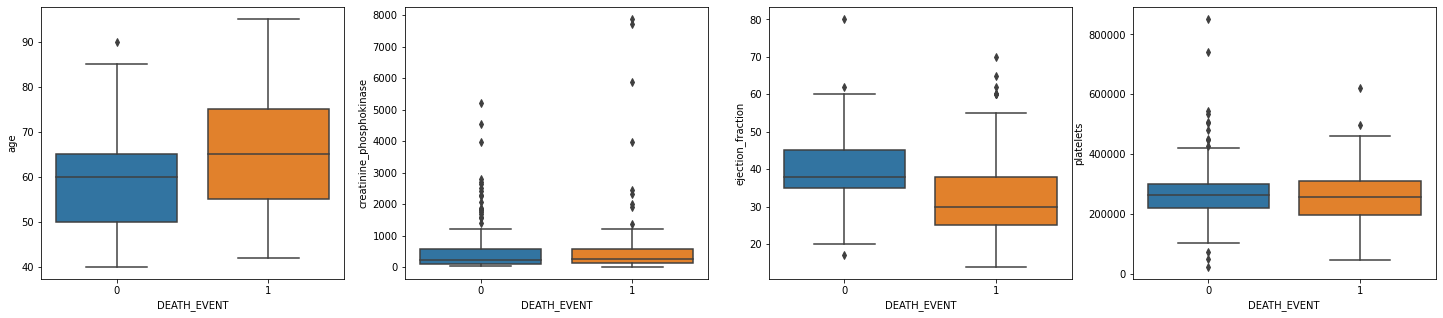

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(25,5))

sns.boxplot(y=heart_df.age, x=heart_df.DEATH_EVENT, ax=axs[0])
sns.boxplot(y=heart_df.creatinine_phosphokinase, x=heart_df.DEATH_EVENT, ax=axs[1])
sns.boxplot(y=heart_df.ejection_fraction, x=heart_df.DEATH_EVENT, ax=axs[2])
sns.boxplot(y=heart_df.platelets, x=heart_df.DEATH_EVENT, ax=axs[3])


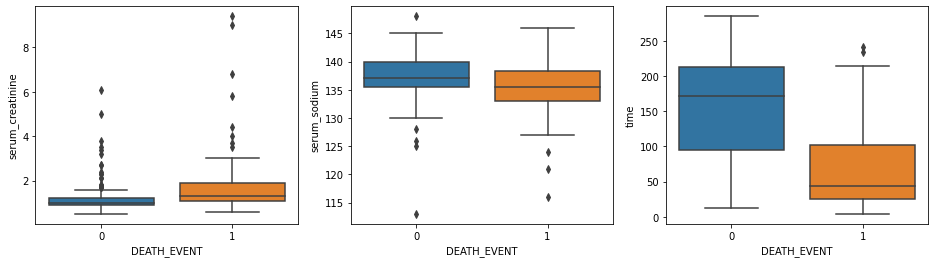

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.boxplot(y=heart_df.serum_creatinine, x=heart_df.DEATH_EVENT, ax=axs[0])
sns.boxplot(y=heart_df.serum_sodium, x=heart_df.DEATH_EVENT, ax=axs[1])
sns.boxplot(y=heart_df.time, x=heart_df.DEATH_EVENT, ax=axs[2])

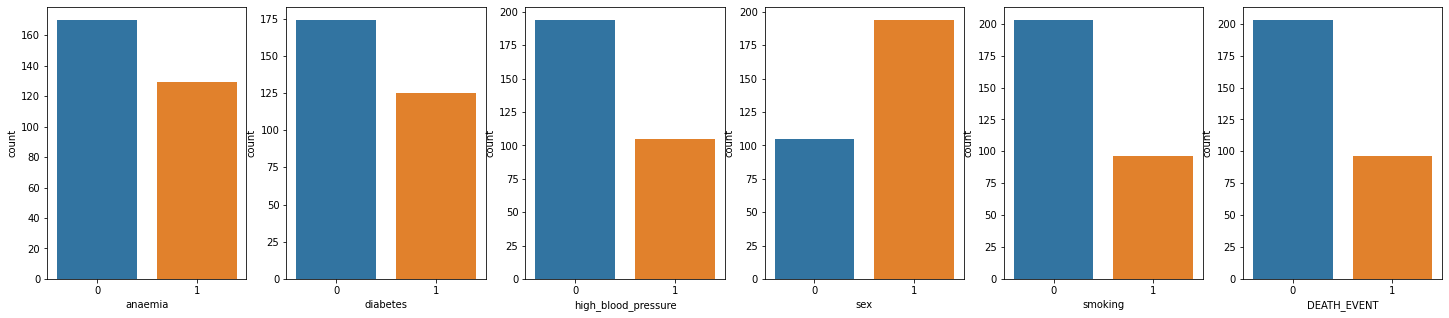

In [ ]:
fig, axs = plt.subplots(ncols=6, figsize=(25,5))

sns.countplot(x='anaemia', data=heart_df, ax=axs[0])
sns.countplot(x='diabetes', data=heart_df, ax=axs[1])
sns.countplot(x='high_blood_pressure', data=heart_df, ax=axs[2])
sns.countplot(x='sex', data=heart_df, ax=axs[3])
sns.countplot(x='smoking', data=heart_df, ax=axs[4])
sns.countplot(x='DEATH_EVENT', data=heart_df, ax=axs[5])

In [ ]:
heart_df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
cm = sns.light_palette("#00688B", as_cmap=True)
heart_df.corr().style.background_gradient(cmap=cm)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Features with highest correlation to death event are age, ejection fraction, serum creatinine, and time

#Test and Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = heart_df.drop(['DEATH_EVENT', 'time'], axis = 1)
y = heart_df['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

(209, 11) (90, 11)


In [ ]:
colnames = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [ ]:
y_train.value_counts()

#Exploratory Analysis

##Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np

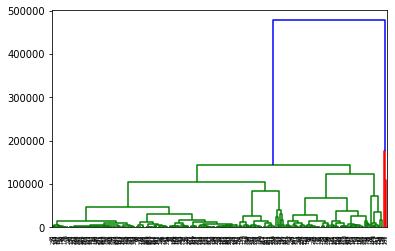

In [ ]:
Z = linkage(X_train, method = 'average', metric = 'euclidean')
dendrogram = sch.dendrogram(Z)

## PCA application on the whole dataset

In [ ]:
X = heart_df.copy()
y = heart_df['DEATH_EVENT']
X = heart_df.drop(['DEATH_EVENT'], axis=1)
print(X.shape); print(y.shape)

(299, 12)
(299,)


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components = 2, random_state = 42)

X_fit = pca.fit_transform(X)
X_fit = pd.DataFrame(X_fit)
X_fit.columns = ["P_Comp_1", "P_Comp_2"]
X_fit["DEATH_EVENT"] = y
X_fit.head(5)

,P_Comp_1,P_Comp_2,DEATH_EVENT
0,1641.969406,-0.145905,1
1,1.766518,7279.254974,1
2,-101358.133289,-411.138654,1
3,-53358.143086,-457.772091,1
4,63641.865204,-437.190782,1


In [ ]:
plt.figure(figsize=(10, 8))
#plt.title("P-Component 2D-plot of dat for first two principal scores")
#sns.scatterplot(data = X_fit, x="P_Comp_1", y="P_Comp_2", hue="DEATH_EVENT")
import plotly.express as px

fig = px.scatter(X_fit, x="P_Comp_1", y="P_Comp_2", color = "DEATH_EVENT", width=700, height=600)
#fig.update_layout(margin = dict(l=10, r=10, t=10, b=10), paper_bgcolor="LightSteelBlue",)
fig.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
import plotly.express as px

pca_3d = PCA(n_components = 3, random_state = 42)
X_fit_3d = pca_3d.fit_transform(X)
X_fit_3d = pd.DataFrame(X_fit_3d)
X_fit_3d.columns = ["P_Comp_1", "P_Comp_2", "P_Comp_3"]
X_fit_3d["DEATH_EVENT"] = y
X_fit_3d.head(5)

,P_Comp_1,P_Comp_2,P_Comp_3,DEATH_EVENT
0,1641.969406,-0.145905,-126.838452,1
1,1.766518,7279.254974,-118.588597,1
2,-101358.133289,-411.138654,-122.907106,1
3,-53358.143086,-457.772091,-122.790991,1
4,63641.865204,-437.190782,-123.419571,1


In [ ]:

fig = px.scatter_3d(X_fit_3d, x='P_Comp_1', y='P_Comp_2', z='P_Comp_3', color='DEATH_EVENT', width=700, height=600)
#fig.update_layout(margin = dict(l=5, r=5, t=5, b=5), paper_bgcolor="LightSteelBlue",)
fig.show()

##PCA On Scaled Train Data

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components = 2, random_state = 42)

X_fit = pca.fit_transform(X_train_scale)
X_fit = pd.DataFrame(X_fit)
X_fit.columns = ["P_Comp_1", "P_Comp_2"]
X_fit["DEATH_EVENT"] = y
X_fit.head(5)

,P_Comp_1,P_Comp_2,DEATH_EVENT
0,-0.925828,-0.459718,1
1,-1.362200,-0.811114,1
2,1.024956,-0.803380,1
3,1.122454,-1.489522,1
4,0.749550,0.172278,1


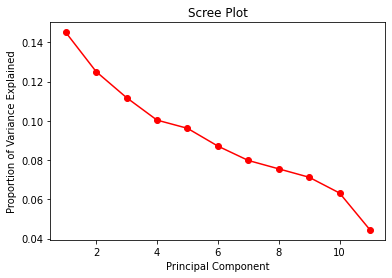

In [ ]:
pca = PCA()

X_fit_plot = pca.fit_transform(X_train_scale)
X_fit_plot = pd.DataFrame(X_fit_plot)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
VarEx = pd.DataFrame(pca.explained_variance_ratio_)
VarEx.columns = ['Variance Explained']

VarEx

,Variance Explained
0,0.145158
1,0.125100
2,0.111836
3,0.100379
4,0.096209
5,0.087137
6,0.079809
7,0.075530
8,0.071243
9,0.063192


In [ ]:
plt.figure(figsize=(10, 8))
#plt.title("P-Component 2D-plot of dat for first two principal scores")
#sns.scatterplot(data = X_fit, x="P_Comp_1", y="P_Comp_2", hue="DEATH_EVENT")
import plotly.express as px

fig = px.scatter(X_fit, x="P_Comp_1", y="P_Comp_2", color = "DEATH_EVENT", width=700, height=600)
#fig.update_layout(margin = dict(l=10, r=10, t=10, b=10), paper_bgcolor="LightSteelBlue",)
fig.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
pca_3d = PCA(n_components = 3, random_state = 42)
X_fit_3d = pca_3d.fit_transform(X_train_scale)
X_fit_3d = pd.DataFrame(X_fit_3d)
X_fit_3d.columns = ["P_Comp_1", "P_Comp_2", "P_Comp_3"]
X_fit_3d["DEATH_EVENT"] = y
X_fit_3d.head(5)

,P_Comp_1,P_Comp_2,P_Comp_3,DEATH_EVENT
0,-0.925828,-0.459718,-0.024186,1
1,-1.362200,-0.811114,0.571288,1
2,1.024956,-0.803380,0.475900,1
3,1.122454,-1.489522,-0.982387,1
4,0.749550,0.172278,0.283320,1


In [ ]:
fig = px.scatter_3d(X_fit_3d, x='P_Comp_1', y='P_Comp_2', z='P_Comp_3', color='DEATH_EVENT', width=700, height=600)
#fig.update_layout(margin = dict(l=5, r=5, t=5, b=5), paper_bgcolor="LightSteelBlue",)
fig.show()

Running PCA gives us mainly noise, no clear clusters are formed.

#Model Plan
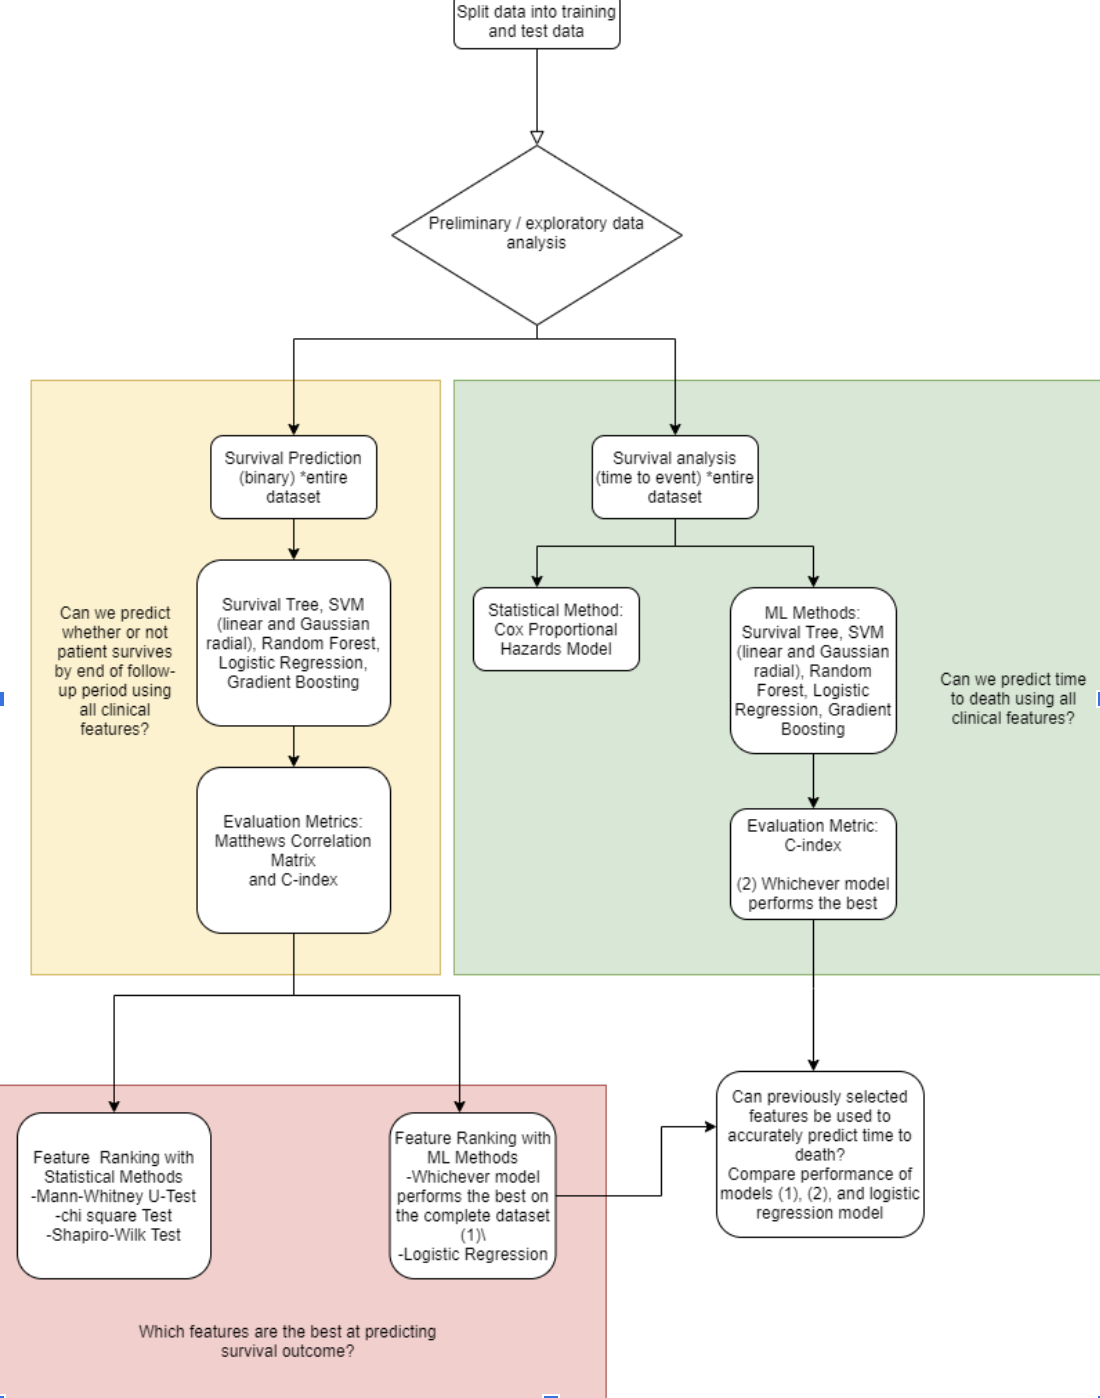

#BINARY SURVIVAL MODELING (Yellow branch of analysis plan)

##Logistic Regression Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix


True Positives(TP) =  53

True Negatives(TN) =  14

False Positives(FP) =  9

False Negatives(FN) =  14
Accuracy: 74.444 %
F-Score: 0.549
AUC: 0.757


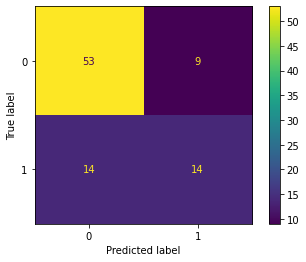

In [ ]:
LR = LogisticRegressionCV()
LR.fit(X_train_scale, y_train)
y_pred = LR.predict(X_test_scale)
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Accuracy:", (accuracy_score(y_test, y_pred)*100).round(3), "%")
print("F-Score:", f1_score(y_test, y_pred).round(3))
print("AUC:", roc_auc_score(y_test, LR.predict_proba(X_test_scale)[:,1]).round(3))

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

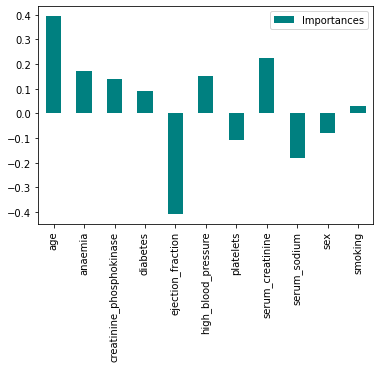

In [ ]:
importances = LR.coef_.flatten()
final_df = pd.DataFrame({'Features': pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')
plot = final_df.plot.bar(color = 'teal')
plot.set_xticklabels(X_train.columns)
X_train.columns

##Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"



True Positives(TP) =  52

True Negatives(TN) =  15

False Positives(FP) =  5

False Negatives(FN) =  18
Accuracy: 74.444 %
F-Score: 0.566
Out of Bag Score: 0.254
AUC: 0.785


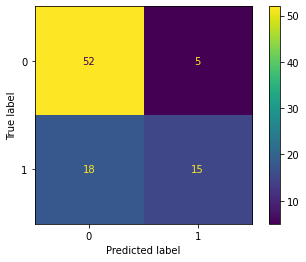

In [ ]:
RandForest = RandomForestClassifier(random_state=42, oob_score=True)
model_fit = RandForest.fit(X_train, y_train)
y_pred = RandForest.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Accuracy:", (accuracy_score(y_test, y_pred)*100).round(3), "%")
print("F-Score:", f1_score(y_test, y_pred).round(3))
print('Out of Bag Score:', (1 - model_fit.oob_score_).round(3))
print("AUC:", roc_auc_score(y_test, RandForest.predict_proba(X_test)[:,1]).round(3))

Index(['age', 'serum_creatinine', 'ejection_fraction'], dtype='object')

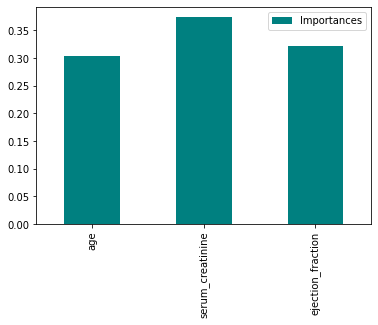

In [ ]:
importances = RandForest.feature_importances_
final_df = pd.DataFrame({'Features': pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')
plot = final_df.plot.bar(color = 'teal')
plot.set_xticklabels(X_train.columns)
X_train.columns

In [ ]:
final_df.sort_values(by='Importances', ascending=False)

,Features,Importances
7,serum_creatinine,0.165390
4,ejection_fraction,0.160978
0,age,0.156265
6,platelets,0.143989
2,creatinine_phosphokinase,0.132000
8,serum_sodium,0.124695
1,anaemia,0.029360
5,high_blood_pressure,0.028139
3,diabetes,0.023320
10,smoking,0.019654


##Gradient Boosting

In [ ]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import roc_auc_score

In [ ]:
X_train.shape
X_val = X_train[:20]
X_val_scale = X_train_scale[:20]
y_val = y_train[:20]
X_train = X_train[20:]
X_train_scale = X_train_scale[20:]
y_train = y_train[20:]

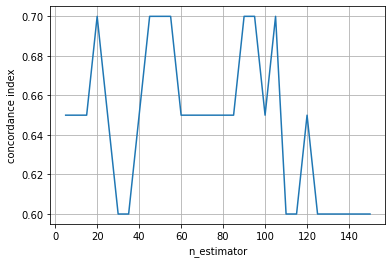

In [ ]:
scores_cph_tree = {}

lgbmodel = LGBMClassifier()
for i in range(1, 31):
    n_estimators = i * 5
    lgbmodel.set_params(n_estimators=n_estimators)
    lgbmodel.fit(X_train_scale, y_train)
    scores_cph_tree[n_estimators] = lgbmodel.score(X_val_scale, y_val)

x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [ ]:
%%capture
lgbmodel = LGBMClassifier()

lgbmodel.fit(X_train_scale, y_train, eval_set= [(X_train_scale, y_train), (X_val_scale, y_val)],eval_metric='auc')


True Positives(TP) =  49

True Negatives(TN) =  13

False Positives(FP) =  13

False Negatives(FN) =  15
Accuracy: 68.889 %
F-Score: 0.481
AUC: 0.741


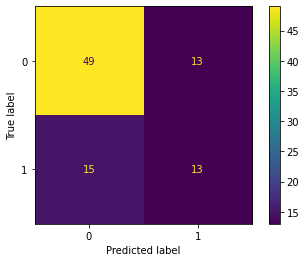

In [ ]:
y_pred = lgbmodel.predict(X_test_scale)
cm = confusion_matrix(y_test, y_pred, labels=lgbmodel.classes_)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Accuracy:", (accuracy_score(y_test, y_pred)*100).round(3), "%")
print("F-Score:", f1_score(y_test, y_pred).round(3))
print("AUC:", roc_auc_score(y_test, lgbmodel.predict_proba(X_test_scale)[:,1]).round(3))

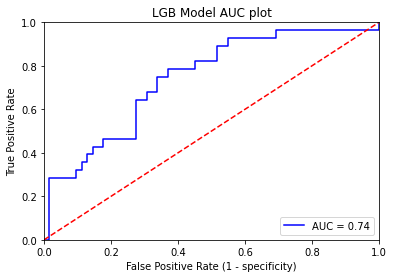

In [ ]:
#creating fpr and tpr values from the predicted model
fpr, tpr, threshold = roc_curve(y_test, lgbmodel.predict_proba(X_test_scale)[:,1])

#computing auc score from fpr and tpr
roc_auc = auc(fpr, tpr)

#AUC plot SVM
%matplotlib inline
plt.figure()

#title of plot
plt.title('LGB Model AUC plot')
#fitting the value
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#mentioning legend
plt.legend(loc = 'lower right')
#mentioning scale of plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#mention y-axis name
plt.ylabel('True Positive Rate')
#mentioning x-axis name
plt.xlabel('False Positive Rate (1 - specificity)')
#output the plot here
plt.show()

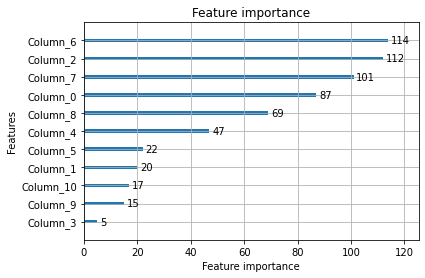

In [ ]:
plot = plot_importance(lgbmodel)

In [ ]:
print(colnames[6], colnames[2], colnames[7])

platelets creatinine_phosphokinase serum_creatinine


##KNN

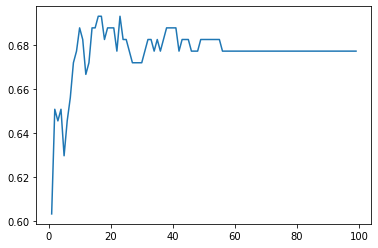

In [ ]:
#calling KFold and mentioning splits
kfold = model_selection.KFold(n_splits=9)

#setting a range of k-values and an empty set for knn scores
knn_neighbors = range(1, 100)
knn_scores = []

#running the loop for score calculation
for i in knn_neighbors:
    data_knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(data_knn, X_train_scale, y_train, cv=kfold, scoring='accuracy')
    knn_scores.append(score.mean())

#plotting k-values against the kfold scores    
plt.plot(knn_neighbors,knn_scores)
plt.show()


True Positives(TP) =  62

True Negatives(TN) =  4

False Positives(FP) =  0

False Negatives(FN) =  24
Accuracy: 73.333 %
Recall: 0.14285714285714285
Precision: 1.0
AUC: 0.751


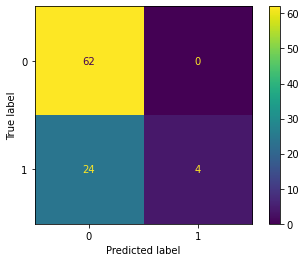

In [ ]:
#fitting KNN model at train_data
data_knn = KNeighborsClassifier(n_neighbors=13).fit(X_train_scale, y_train)

#predicting using test_set
y_pred = data_knn.predict(X_test_scale)

#predicting probability using test_set
predicted_proba = data_knn.predict_proba(X_test_scale)

#getting confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#printing accuracy, recall and precision score
print("Accuracy:", (accuracy_score(y_test, y_pred)*100).round(3), "%")
print("F-Score:", f1_score(y_test, y_pred).round(3))
print("AUC:", roc_auc_score(y_test, predicted_proba[:,1]).round(3))

In [ ]:
#creating fpr and tpr values from the predicted model
fpr1, tpr1, threshold = roc_score(y_test, predicted_proba[:,1])
#computing auc score from fpr and tpr
roc_auc = auc(fpr1, tpr1)
#AUC plot KNN
%matplotlib inline
plt.figure()

#title of plot
plt.title('KNN AUC plot')
#fitting the value
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
#mentioning legend
plt.legend(loc = 'lower right')
#mentioning scale
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#mentioning name of y-axis
plt.ylabel('True Positive Rate')
#mentioning name of x-axis
plt.xlabel('False Positive Rate (1 - specificity)')
#output the plot here
plt.show()

NameError: ignored

## SVM

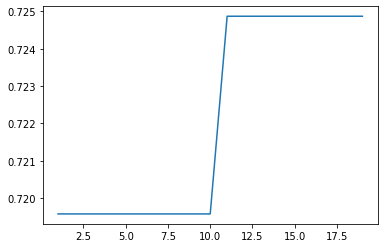

In [ ]:
#calling KFold and mentioning splits
kfold = model_selection.KFold(n_splits=9)

#setting a range of cost and blank for score for SVM
svm_cost = range(1, 20)
svm_scores = []

#running the loop to calculate SVM accuracy score using KFold
for i in svm_cost:
    data_svm = SVC(C=i, kernel="linear", probability=True, random_state=42)
    score = cross_val_score(data_svm, X_train_scale, y_train, cv=kfold, scoring='accuracy')
    svm_scores.append(score.mean())

#plotting the svm cost against kfold score    
plt.plot(svm_cost,svm_scores)
plt.show()


True Positives(TP) =  53

True Negatives(TN) =  13

False Positives(FP) =  9

False Negatives(FN) =  15
accuracy: 0.733
F-Score: 0.25
AUC:  0.753


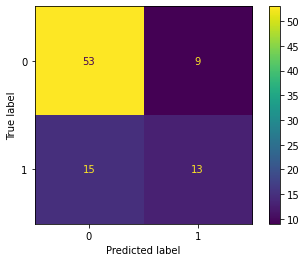

In [ ]:
svm_model = SVC(C=4, kernel="linear", probability=True, random_state=42)

#fitting x_train and y_train in the model
svm_model.fit(X_train_scale, y_train)

#predicting using test_data
pred = svm_model.predict(X_test_scale)

#computing confusion matrix
cm = confusion_matrix(y_test, svm_model.predict(X_test_scale))
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
disp = ConfusionMatrixDisplay(cm)
disp.plot()
#printing accuracy, recall and precision score
print("accuracy:",accuracy_score(y_test, pred).round(3))
print("F-Score:", f1_score(y_test, y_pred).round(3))
print("AUC: ", roc_auc_score(y_test, svm_model.predict_proba(X_test_scale)[:,1]).round(3))

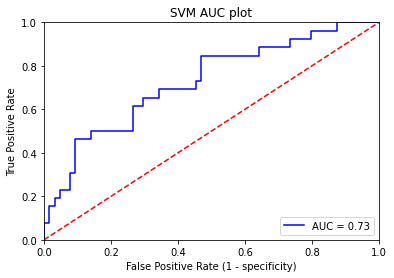

In [ ]:
#creating fpr and tpr values from the predicted model
fpr, tpr, threshold = roc_curve(y_test, svm_model.predict_proba(X_test_scale)[:,1])

#computing auc score from fpr and tpr
roc_auc = auc(fpr, tpr)

#AUC plot SVM
%matplotlib inline
plt.figure()

#title of plot
plt.title('SVM AUC plot')
#fitting the value
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#mentioning legend
plt.legend(loc = 'lower right')
#mentioning scale of plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
#mention y-axis name
plt.ylabel('True Positive Rate')
#mentioning x-axis name
plt.xlabel('False Positive Rate (1 - specificity)')
#output the plot here
plt.show()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

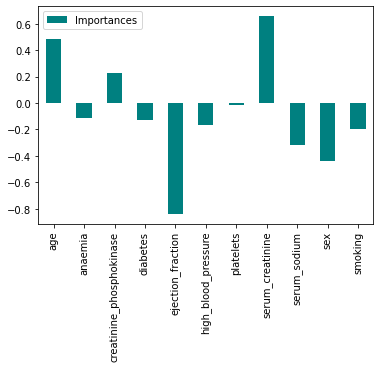

In [ ]:
importances = svm_model.coef_.flatten()
final_df = pd.DataFrame({'Features': pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')
plot = final_df.plot.bar(color = 'teal')
plot.set_xticklabels(X_train.columns)
X_train.columns

In [ ]:
print(final_df)

#TIME TO EVENT ANALYSIS (Green branch of analysis plan)

##With all clinical features

In [ ]:
X = heart_df.drop(['time', 'DEATH_EVENT'], axis=1)
y = heart_df[['DEATH_EVENT','time']]
y['DEATH_EVENT'] = y['DEATH_EVENT'].astype(bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
print(X_train.shape, X_test.shape)

X_val = X_train[:20]
y_val = y_train[:20]
X_train = X_train[20:]
y_train = y_train[20:]

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_val_scale = scaler.fit_transform(X_val)
X_test_scale = scaler.transform(X_test)

(209, 11) (90, 11)


In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
aux = [(e1,e2) for e1,e2 in y_train]
y_train = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

aux = [(e1,e2) for e1,e2 in y_val]
y_val = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

aux = [(e1,e2) for e1,e2 in y_test]
y_test = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

###Random Survival Forest

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (concordance_index_censored,
                            cumulative_dynamic_auc)

rsf = RandomSurvivalForest(max_features= 'auto', n_estimators=50)
rsf.fit(X_train, y_train)
y_pred = rsf.predict(X_test)

print('CI Score:', rsf.score(X_test, y_test))

In [ ]:
scores_rsf_tree = {}

est_rsf_tree = RandomSurvivalForest()
for i in range(1, 31):
    n_estimators = i * 5
    est_rsf_tree.set_params(n_estimators=n_estimators)
    est_rsf_tree.fit(X_train, y_train)
    scores_rsf_tree[n_estimators] = est_rsf_tree.score(X_val, y_val)

x, y = zip(*scores_rsf_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [ ]:
surv = rsf.predict_survival_function(X_test, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.grid(True)

### Linear Survival SVM

In [ ]:
#Linear SVM
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM, FastKernelSurvivalSVM

fastSVM = FastSurvivalSVM(max_iter=1000, tol=1e-3, random_state=8)

fastSVM.fit(X_train_scale, y_train)
cindex = fastSVM.score(X_test_scale, y_test)
print(round(cindex, 3))

### Kernel Survival SVM



In [ ]:
# Kernel SVM
from sksurv.svm import FastKernelSurvivalSVM

fastKSVM = FastKernelSurvivalSVM(optimizer="rbtree", kernel="linear", random_state=8)

fastKSVM.fit(X_train_scale, y_train)
cindex = fastKSVM.score(X_test_scale, y_test)
print(round(cindex, 3))

###Gradient Boosted Model

In [ ]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(
    learning_rate=1.0, max_depth=1, random_state=0
)
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_val, y_val)

x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [ ]:
gbsa = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=42, n_estimators=120)
gbsa.fit(X_train, y_train)
gbsa.score(X_test, y_test)

##With Serum creatinine, ejection fraction, and age selected as features

In [ ]:
X = heart_df[['serum_creatinine', 'ejection_fraction', 'age']]
y = heart_df[['DEATH_EVENT','time']]
y['DEATH_EVENT'] = y['DEATH_EVENT'].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
print(X_train.shape, X_test.shape)

X_val = X_train[:20]
y_val = y_train[:20]
X_train = X_train[20:]
y_train = y_train[20:]

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_val_scale = scaler.fit_transform(X_val)
X_test_scale = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
aux = [(e1,e2) for e1,e2 in y_train]
y_train = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

aux = [(e1,e2) for e1,e2 in y_val]
y_val = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

aux = [(e1,e2) for e1,e2 in y_test]
y_test = np.array(aux, dtype=[('Dead', '?'), ('Survival_in_days', '<f8')])

###Random Survival Forest

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (concordance_index_censored,
                            cumulative_dynamic_auc)

rsf = RandomSurvivalForest(max_features= 'auto')
rsf.fit(X_train_scale, y_train)
y_pred = rsf.predict(X_test)

print('CI Score:', rsf.score(X_test_scale, y_test).round(3))

### Linear Survival SVM

In [ ]:
#Linear SVM
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM, FastKernelSurvivalSVM

fastSVM = FastSurvivalSVM(max_iter=1000, tol=1e-3, random_state=8)

fastSVM.fit(X_train_scale, y_train)
cindex = fastSVM.score(X_test_scale, y_test)
print(round(cindex, 3))

###Kernel Survival SVM

In [ ]:
# Kernel SVM
from sksurv.svm import FastKernelSurvivalSVM

fastKSVM = FastKernelSurvivalSVM(optimizer="rbtree", kernel="linear", random_state=8)

fastKSVM.fit(X_train_scale, y_train)
cindex = fastKSVM.score(X_test_scale, y_test)
print(round(cindex, 3))

###Gradient Boosted Model

In [ ]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis()
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train_scale, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_val_scale, y_val)

x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [ ]:
gbsa = GradientBoostingSurvivalAnalysis(n_estimators=32)
gbsa.fit(X_train_scale, y_train)
gbsa.score(X_test_scale, y_test).round(3)